<a href="https://colab.research.google.com/github/morenoraul/desarrolloia/blob/main/Coloquio_Desarrollo_Sistema_de_Inteligencia_Artificial_MORENO_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<img src="https://elementos.entornos.net/clientes/ISPC/ispc.png" width="350" height="200">



**TECNICATURA SUPERIOR EN INNOVACIÓN CON TECNOLOGÍAS 4.0**

**SISTEMAS DE DESARROLLO DE INTELIGENCIA ARTIFICIAL**

SEGUNDO AÑO - COLOQUIO



---



**Tensorflow - Optimización de modelos de deep learning con Adam para aplicaciones en la industria 4.0**




---



Alumno: Raúl Moreno

Docente: Cr. Sol del Valle Figueroa

22 de Noviembre  de 2023


#**Introducción**
El aprendizaje profundo y el uso de redes neuronales están transformando la industria 4.0. Para entrenar estos modelos se requieren algoritmos de optimización eficientes. Uno de los más utilizados es Adam (Adaptive Moment Estimation), que combina las ventajas del momento y RMSProp.

En este trabajo se presenta el uso de Adam para entrenar modelos en TensorFlow/Keras, utilizando como caso práctico la clasificación de imágenes del conjunto de datos MNIST.

Sse desarrolla un ejemplo práctico paso a paso, posteriormente  se discuten aplicaciones en la industria 4.0 como detección de anomalías, mantenimiento predictivo y automatización de procesos.


#**Desarrollo**

La industria 4.0 trae consigo la automatización inteligente a través de tecnologías como el internet de las cosas (IoT), big data, robótica avanzada y aprendizaje automático.

Dentro del aprendizaje automático, las redes neuronales profundas están demostrando un gran potencial para resolver problemas complejos en una variedad de dominios, donde entrenar estos  modelos profundos y robustos representa un desafío computacional.

Los algoritmos de optimización juegan un rol crítico,  permitiendo encontrar los parámetros óptimos para minimizar la función de pérdida del modelo. Uno de los más populares es Adam (Adaptive Moment Estimation), que combina las ventajas del momentum y el método RMSProp. Adam permite entrenar modelos rápidamente incluso con grandes cantidades de datos.


# **Caso Practico: Clasificación de dígitos escritos a mano**

Para demostrar el uso de Adam, desarrollaremos una red neuronal para clasificar imágenes de dígitos escritos a mano del conjunto de datos MNIST.
MNIST contiene 70,000 imágenes en escala de grises de 28x28 píxeles de dígitos manuscritos de 0 a 9.

El objetivo es entrenar un modelo que reciba las imágenes y prediga el dígito correcto.



#Importar Librerias
Primero se importan los módulos necesarios:
-  Tensorflow  proveee implementaciones eficientes y optimizadas del algoritmo Adam listas para construir y entrenar el modelo
-  Importamos keras, la API de alto nivel de TensorFlow para construir modelos
-  Matplotlib.pylot permite generar gráfico.

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

# Cargar datos

Se cargan los datos de entrenamiento y prueba de MNIST

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()


# Preprocesar datos

Aplanamos las imágenes a vectores y normalizamos los valores entre 0-1


In [ ]:
x_train = x_train.reshape(-1, 28*28).astype('float32') / 255.0
x_test = x_test.reshape(-1, 28*28).astype('float32') / 255.0

# Definir modelo

Luego definimos y compilamos el modelo secuencial

In [ ]:
model = keras.Sequential()
model.add(keras.layers.Dense(64, input_dim=28*28, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

# Compilar modelo

Definimos el modelo secuencial y agregamos capas densas



In [ ]:
optimizer = keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

# Entrenar modelo

Entrenamos el modelo durante 10 ciclos y evaluamos sobre los datos de test:

In [ ]:
hist = model.fit(x_train, y_train,
          validation_data=(x_test, y_test),
          epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2979 - accuracy: 0.9164 - val_loss: 0.1576 - val_accuracy: 0.9526
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1433 - accuracy: 0.9574 - val_loss: 0.1254 - val_accuracy: 0.9614
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1031 - accuracy: 0.9693 - val_loss: 0.1032 - val_accuracy: 0.9671
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0813 - accuracy: 0.9753 - val_loss: 0.0909 - val_accuracy: 0.9714
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0672 - accuracy: 0.9796 - val_loss: 0.0878 - val_accuracy: 0.9719
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0558 - accuracy: 0.9827 - val_loss: 0.0898 - val_accuracy: 0.9720
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0470 - accuracy: 0.9852 - val_loss: 0.0864 - val_accuracy:

# Muestra en imagenes de ejemplos del modelo de datos

1/1 [==============================] - 0s 49ms/step


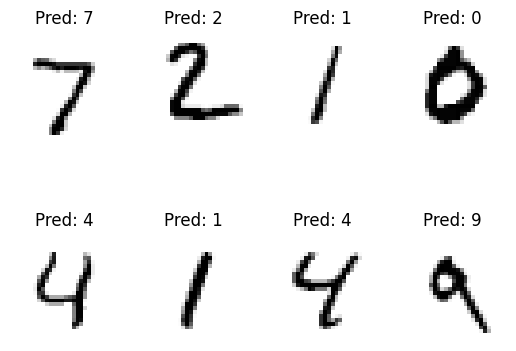

In [ ]:
import matplotlib.pyplot as plt

# Tomar algunas muestras del conjunto de prueba
X_samples = x_test[:10]

# Hacer predicciones en las muestras
y_pred = model.predict(X_samples)

# Convertir las muestras a shape original
X_samples = X_samples.reshape(-1, 28, 28)

# Plotear 4 muestras y sus predicciones
fig, axes = plt.subplots(2, 4)
for i,ax in enumerate(axes.flat):

  img = X_samples[i]
  pred = y_pred[i]

  ax.imshow(img, cmap='binary')
  ax.set_title(f"Pred: {pred.argmax()}")

  ax.axis('off')

plt.show()

# Evaluar modelo

Evaluamos el modelo en el conjunto de prueba



In [ ]:
loss, accuracy = model.evaluate(x_test, y_test)
print('Test accuracy:', accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.0889 - accuracy: 0.9746
Test accuracy: 0.9746000170707703


# Gráficos
Graficamos las curvas de pérdida de entrenamiento y validación



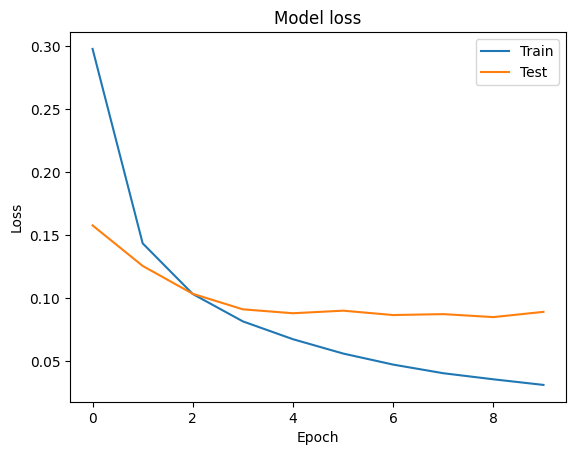

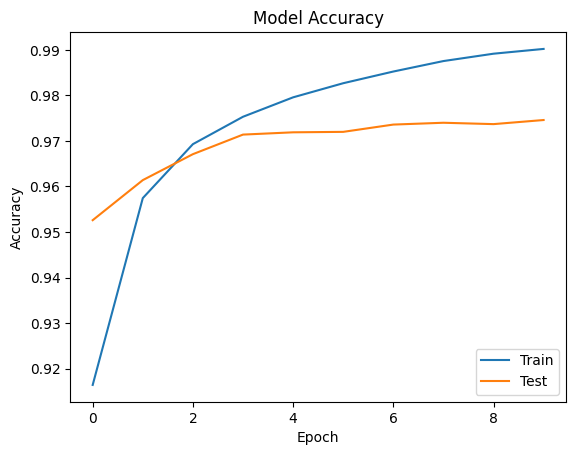

In [ ]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()

# Aplicaciones en la industria 4.0

Los modelos de deep learning optimizados con Adam pueden implementarse en una amplia variedad de aplicaciones en la industria 4.0:



*  Mantenimiento predictivo: entrenando modelos que utilicen datos de sensores para predecir fallas de equipos antes que sucedan.

*  Automatización de procesos: con robots que aprenden tareas específicas en fábricas, almacenes y líneas de producción.

*  Logística: para clasificación automática de productos, gestión de inventarios, entre otros.

*  Control de calidad: utilizando técnicas como deep learning para detectar items defectuosos.

*  Detección de objetos: para identificar componentes en líneas de ensamblaje automatizadas.

*  Recomendación de productos: sugerir artículos a clientes según su historial de compras y preferencias.

Estos son solo algunos ejemplos de los amplios casos de uso de modelos de IA optimizados con Adam en la industria 4.0, que permiten crear procesos más eficientes, seguros y libres de errores humanos.


# Conclusión

Los conceptos de optimizadores, se utilizan en una amplia gama de aplicaciones de la industria, en particular, los siguientes aspectos de estos conceptos son innovadores en las tecnologías e industrias 4.0:

* El uso de optimizadores avanzados, como Adam, permite a las redes neuronales entrenarse más rápido y con mayor precisión.

* Los optimizadores avanzados, como Adam, utilizan técnicas como el momentum y la regularización para ayudar a las redes neuronales a converger más rápido y con mayor precisión. Esto es importante para aplicaciones industriales, donde las redes neuronales a menudo se utilizan para resolver problemas en tiempo real.

* Las funciones de optimizadores ADAM, RMSprop y SGD son herramientas esenciales para entrenar modelos de aprendizaje profundo en industrias y tecnologías 4.0. Estos algoritmos permiten encontrar los parámetros que minimizan la función de pérdida de una red neuronal, lo que es necesario para que el modelo funcione correctamente.

Estos aspectos están permitiendo a las empresas de la industria 4.0 desarrollar soluciones innovadoras que mejoran la eficiencia, la productividad y la seguridad a medida que la tecnología continúa desarrollándose, es probable que veamos un uso aún mayor de estos conceptos en las industrias 4.0.


# Fuente Bibliográfica:
Apuntes de la cátedra de Desarrollo de Sistema de Inteligencia Artificial. (2023). Tecnicatura Superior de Tecnologías e Innovación 4.0 . Instituto Superior del Politécnico Córdoba.
